# Team Tyrell - Decade Predictor
This explores various ML classifier methods to predict music decade a given song/track.  
-Uses SKLearn's Random Forest Classifier and evaluates accuracy and results  
-Also considers a K Nearest Neighbor model  
-Exports the RF model and the scaler for use in other app   
***

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
musicData = pd.read_csv("Resources/music_spotify.csv")

# musicData

In [3]:
# Replace the year with decade
# Define a lambda function to extract the decade and apply function
decade_func = lambda year: str(year)[:3] + "0s"
musicData['decade'] = musicData['year'].apply(decade_func)
musicData = musicData.drop('year', axis=1)

# make a list of the decades for labelling
decades = musicData['decade'].unique()

In [4]:
# Drop non-contributing ID columns
musicDF = musicData.drop(columns=['artists', 'id', 'name', 'release_date'])


# Optional: Change Artist Name and Track Name to string
#cat_col = ['Artist Name','Track Name']

#for i in cat_col:
#    data[i] = data[i].astype('str') 


#musicDF

In [5]:
# Count the number of NaN values in each column
nan_counts = musicDF.isna().sum()
#nan_counts

### Split Data Into Features and our Label (genre)

In [6]:
# Separate the data into labels (Class = genre) and features/attributes

# Separate the y variable, the labels
y = musicDF["decade"].values


# Separate the X variable, the features
X = musicDF.drop("decade", axis=1).values

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#### Scale Data

In [8]:
# import the StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

# make the instance of the standard scaler
scaler = StandardScaler()

# fit the scaler onto the data
X_scaler = scaler.fit(X_train)

# scale the x train and test using .transform function
xTrainScaled = X_scaler.transform(X_train)
xTestScaled = X_scaler.transform(X_test)

### First Try Random Forest Classifier to Create Model

In [9]:
# import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# create the random forest classifier model
rfModel = RandomForestClassifier(n_estimators=500, random_state=80)

# fit the model onto our scaled X training data and the trained y data
rfModel = rfModel.fit(xTrainScaled, y_train)

In [10]:
# make the predictions using the testing data
predictedValues = rfModel.predict(xTestScaled)

#### Determine Accuracy

In [11]:
# import the modules for the confusion matrix, accuracy score, and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"Random Forest Classifier Accuracy Score: {(accuracyScore*100):.2f}%")

Random Forest Classifier Accuracy Score: 53.01%


In [13]:
# rf confusion matrix; Predicted is columns, Actuals are rows
rfConfusionData = confusion_matrix(y_test, predictedValues)

rfConfusionDF = pd.DataFrame(
    rfConfusionData,
    index=decades,
    columns=decades
)
#rfConfusionDF

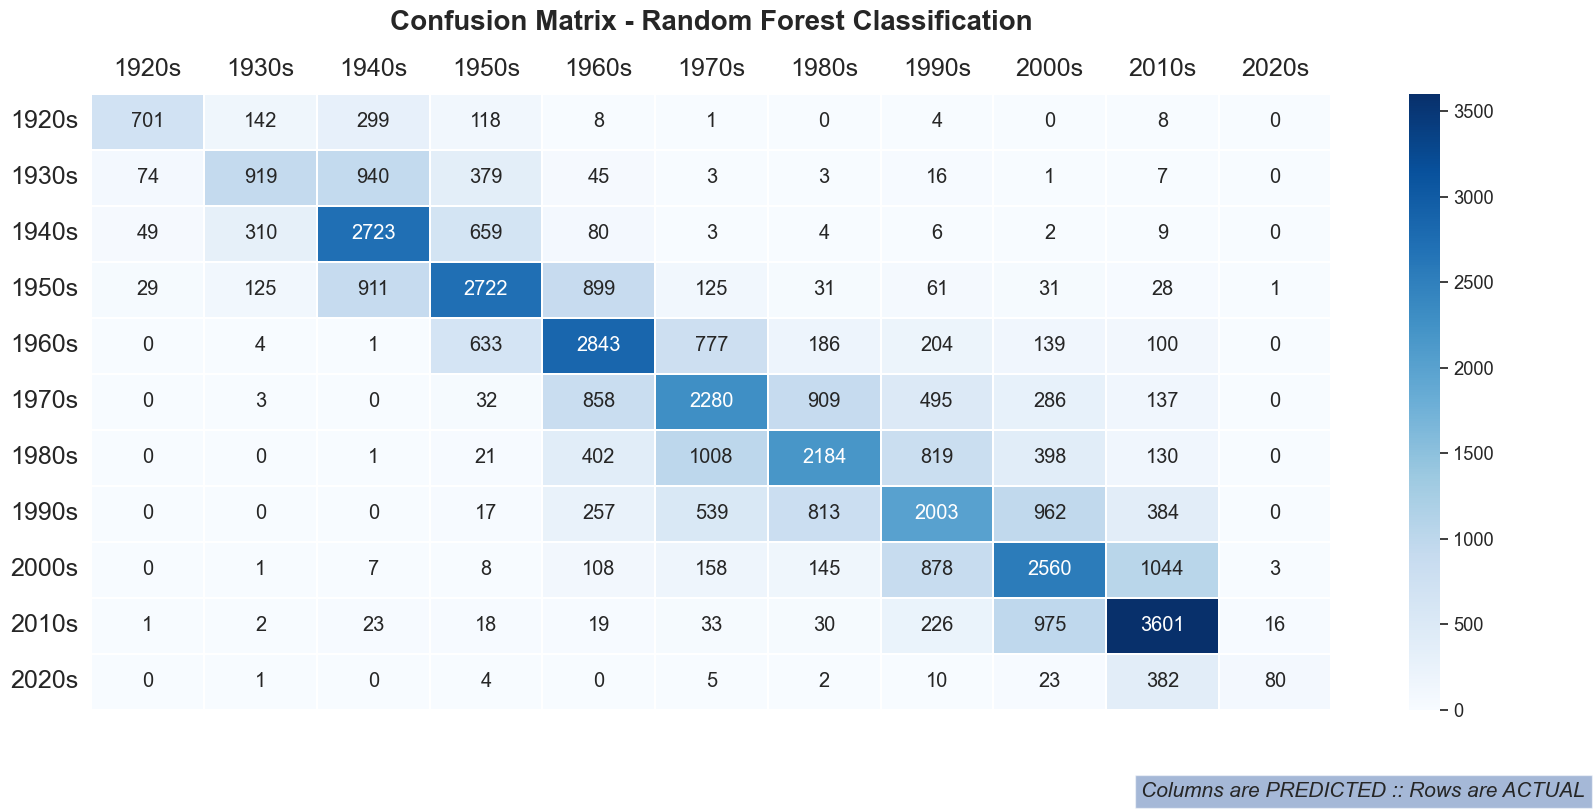

<Figure size 640x480 with 0 Axes>

In [36]:
# Plot heatmap for confusion matrix
plt.figure(figsize=(20,8))  
plt.title(f"Confusion Matrix - Random Forest Classification", fontsize=20, weight = 'bold', pad=20)

ax = sns.heatmap(rfConfusionDF, cmap ='Blues', linewidths = 0.30, annot = True, fmt='.0f')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

sns.set(font_scale=1.2)
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.tick_params(axis='both', which='major', labelsize=18, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.figtext(.65, 0.001, "Columns are PREDICTED :: Rows are ACTUAL", fontsize=15, style = 'italic', bbox={"alpha":0.5, "pad":5})

plt.show()
plt.tight_layout()

In [15]:
# classification report
print("CLASSIFICATION REPORT - RANDOM FOREST")
print(classification_report(y_test, predictedValues, target_names = decades))

CLASSIFICATION REPORT - RANDOM FOREST
              precision    recall  f1-score   support

       1920s       0.82      0.55      0.66      1281
       1930s       0.61      0.39      0.47      2387
       1940s       0.56      0.71      0.62      3845
       1950s       0.59      0.55      0.57      4963
       1960s       0.52      0.58      0.55      4887
       1970s       0.46      0.46      0.46      5000
       1980s       0.51      0.44      0.47      4963
       1990s       0.42      0.40      0.41      4975
       2000s       0.48      0.52      0.50      4912
       2010s       0.62      0.73      0.67      4944
       2020s       0.80      0.16      0.26       507

    accuracy                           0.53     42664
   macro avg       0.58      0.50      0.51     42664
weighted avg       0.54      0.53      0.53     42664



In [16]:
# calculate feature importance 
importantFeatures = rfModel.feature_importances_
featureNames = musicDF.drop("decade", axis=1).columns

# sort the features by their importance, zip them, and display them
zippedFeatures = sorted(zip(importantFeatures, featureNames), reverse=True)
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
# importantFeaturesDF

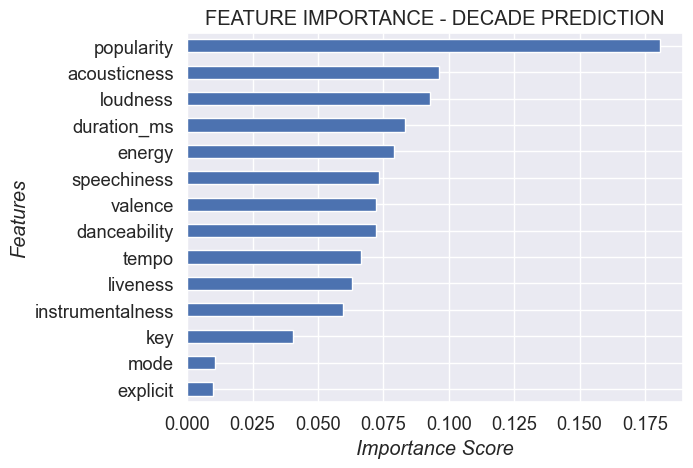

In [37]:
# Plot feature importances as horizontal bar chart
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")

fig, ax = plt.subplots()
importantFeaturesDFSorted.plot.barh(ax=ax, legend=False)
ax.set_title('FEATURE IMPORTANCE - DECADE PREDICTION')
ax.set_xlabel('Importance Score', fontstyle='italic')
ax.set_ylabel('Features', fontstyle='italic')
plt.show()

### Try K Nearest Neighbor (KNN) Classifyier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xTrainScaled, y_train)


KNeighborsClassifier(n_neighbors=10)

In [19]:
predictedValues = knn.predict(xTestScaled)

In [20]:
# calculate the accuracy score
accuracyScore = accuracy_score(y_test, predictedValues)
print(f"KNN Model Accuracy Score: {(accuracyScore*100):.2f}%")

KNN Model Accuracy Score: 42.00%


## Export The Model and Scaler

In [21]:
import joblib
joblib.dump(rfModel, 'rfModel.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']